# 머신러닝 기반 감성 분석
## 1. NLTK 영화 리뷰 데이터셋 - movie_reviews
&nbsp; &nbsp; &nbsp;  1) train/test split <br/>
&nbsp; &nbsp; &nbsp;  2) TF-IDF 벡터로 변환 <br/>
&nbsp; &nbsp; &nbsp;  3) 나이브 베이즈 분류기 학습 <br/>
&nbsp; &nbsp; &nbsp;  +) 로지스틱 회귀분석 <br/>

In [1]:
# movie_reviews 불러오기
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

# id를 이용해 데이터 가져옴
fileids = movie_reviews.fileids()

reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=7)   # train_test_split(X, y, test_size, random_state)

print('Train length: ', len(X_train))
print('Test length: ', len(X_test))

Train length:  1600
Test length:  400


In [6]:
# TF-IDF 벡터
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# shape 확인
print('# Train set dimension: ', X_train_tfidf.shape)
print('# Test set dimension: ', X_test_tfidf.shape)

# Train set dimension:  (1600, 36189)
# Test set dimension:  (400, 36189)


In [7]:
# 나이브 베이즈 분류기
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB(alpha=0.01)          
NB.fit(X_train_tfidf, y_train)

print('# Train score: {:.3f}'.format(NB.score(X_train_tfidf, y_train)))
print('# Test score: {:.3f}'.format(NB.score(X_test_tfidf, y_test)))
# 감성 사전을 이용한 어휘 기반 감성분석보다 성능이 뛰어남을 알 수 있음!

# Train score: 0.998
# Test score: 0.797


In [9]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

print('# Regression train score: {:.3f}'.format(lr.score(X_train_tfidf, y_train)))
print('# Regression test score: {:.3f}'.format(lr.score(X_test_tfidf, y_test)))
# 나이브 베이즈보다 성능이 뛰어남

# predict
y_pred = lr.predict(X_test_tfidf)

# Regression train score: 0.959
# Regression test score: 0.845


<br/>

## 2. 다음 영화 리뷰 데이터셋
&nbsp; &nbsp; &nbsp; 1) train/test split <br/>
&nbsp; &nbsp; &nbsp; 2) konlpy의 Okt로 형태소 분석 - 명사, 동사, 형용사 추출 <br/>
&nbsp; &nbsp; &nbsp; 3) TF-IDF 벡터로 변환 <br/>
&nbsp; &nbsp; &nbsp; 4) 성능 지표 확인 - 정확도, 정밀도, 재현율, f1 score... <br/>
&nbsp; &nbsp; &nbsp; 5) 회귀분석 - 선형회귀분석, 로지스틱 회귀분석 <br/> <br/>

In [27]:
# 먼저 데이터 살펴보기
import pandas as pd

df = pd.read_csv('../data/daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


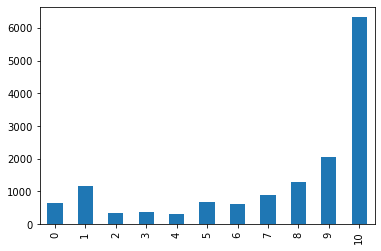

In [33]:
# rating 분포
import matplotlib.pyplot as plt
%matplotlib inline

df['rating'].value_counts().sort_index().plot(kind='bar')  # 막대 그래프
#df['rating'].plot.hist(bins=10)    # 히스토그램
plt.show()

# 평점의 분포가 고르지 않음 => 불균형 데이터셋, 성능이 잘 나오기 어렵고 예측이 어려움

<br/><br/><br/>

## 불균형 데이터 성능 지표
**정밀도(Precision)**: 긍정으로 예측한 대상 중, 실제로 긍정인 데이터의 비율 **TP/TP+FP** <br/>
**재현율(Recall)**: 실제 긍정인 데이터 중, 긍정으로 예측한 대상의 비율 **TP/TP+FN** <br/>
<br/><br/>

## 혼동행렬(Confusion Matrix)
| | 긍정으로 예측한 리뷰(PP) | 부정으로 예측한 리뷰(PN) | |
|---|---|---|---|
|실제 긍정인 리뷰(P) | True positive(TP) | False negative(FN) | 재현율(Recall, Sensitivity) <br/>= TP/TP+FN|
|실제 부정인 리뷰(N) | False positive(FP) | True negative(TN) | 특이도(Specificity) <br/>= TN/FP+TN|
| | 정밀도(Precision) <br/>= TP/TP+FP | | 정확도(Accuracy) <br/>= TP+TN/TP+TN+FP+FN|

<br/><br/>
## 회귀분석
방법 1) 평점이 0~10까지 연속된 값이므로 LinearRegression으로 학습 및 예측한 뒤, 긍정/부정 판별 <br/>
방법 2) 평점을 긍정/부정으로 변환한 뒤, 이를 이용해 LogisticRegression

In [37]:
# 1. LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['rating'], random_state=7)
print('# Train size: ', len(X_train))
print('# Test size: ', len(X_test))

# konlpy로 형태소 분석
from konlpy.tag import Okt

t = Okt()

# 명사, 동사, 형용사 추출
def twit_tokenizer(text):
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in t.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
            
    return result

# tfidf 행렬 생성
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, max_features=2000, min_df=5, max_df=0.5) #명사, 동사, 형용사를 이용하여 tfidf 생성
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train size:  11043
# Test size:  3682


In [38]:
# LinearRegression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_tfidf, y_train)
print('#Regression Train set R2 score: {:.3f}'.format(lr.score(X_train_tfidf, y_train)))
print('#Regression Test set R2 score: {:.3f}'.format(lr.score(X_test_tfidf, y_test)))

#Regression Train set R2 score: 0.605
#Regression Test set R2 score: 0.395


In [41]:
# 정밀도, 재현율, f1-score로 성능 확인

# 평점 5 이상이면 긍정, 그 외는 부정으로 변환
y_train_senti = (y_train > 5)   # 5보다 크면 True, 작으면 False
y_test_senti = (y_test > 5)

# predict
y_train_predict = (lr.predict(X_train_tfidf) > 5)
y_test_predict = (lr.predict(X_test_tfidf) > 5)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# train 정확도, 정밀도, 재현율, f1-score
print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))
print()

# test 정확도, 정밀도, 재현율, f1-score
print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.888
#Precision for train set: 0.893
#Recall for train set: 0.969
#F1 for train set: 0.929

#Accuracy for test set: 0.848
#Precision for test set: 0.868
#Recall for test set: 0.946
#F1 for test set: 0.905


In [42]:
# 2. LogisticRegression
from sklearn.linear_model import LogisticRegression 

#count vector에 대해 regression을 해서 NB와 비교
LR_clf = LogisticRegression() 
LR_clf.fit(X_train_tfidf, y_train_senti)   # 변환한 극성값 이용

y_train_predict = LR_clf.predict(X_train_tfidf)
y_test_predict = LR_clf.predict(X_test_tfidf)

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))
print()

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.878
#Precision for train set: 0.878
#Recall for train set: 0.973
#F1 for train set: 0.923

#Accuracy for test set: 0.855
#Precision for test set: 0.866
#Recall for test set: 0.958
#F1 for test set: 0.910
